In [97]:
import pandas as pd 
import os 
import networkx as nx

In [98]:
pwd = os.getcwd()
print(pwd)

x:\Datasets\Blockchain\xblock.pro\Phishing


In [99]:
# 使用networkx构建图
G = nx.Graph()

In [100]:
address = "0x1fd41f2da3fcd5e61c4a6b70d387e480b6c38dba"

# 一阶节点
tx_1d = pd.read_csv(pwd + "/钓鱼一阶节点/" + address + ".csv")
node2id = {}
id2node = {}

for x in range(len(tx_1d)):
    item = tx_1d.iloc[x]
    if item['From'] not in node2id:
        node2id[item['From']] = len(node2id)
        id2node[node2id[item['From']]] = item['From']
    if item['To'] not in node2id:
        node2id[item['To']] = len(node2id)
        id2node[node2id[item['To']]] = item['To']

# 添加节点
center = node2id[address]
G.add_node(center, type = 'center')

for x in range(len(tx_1d)):
    item = tx_1d.iloc[x]
    if node2id[item['From']] not in G.nodes:
        G.add_node(node2id[item['From']], type = '1d_normal')
    if node2id[item['To']] not in G.nodes:
        G.add_node(node2id[item['To']], type = '1d_normal')
    G.add_edge(node2id[item['From']], node2id[item['To']], weight=item['Value'], type='1d')


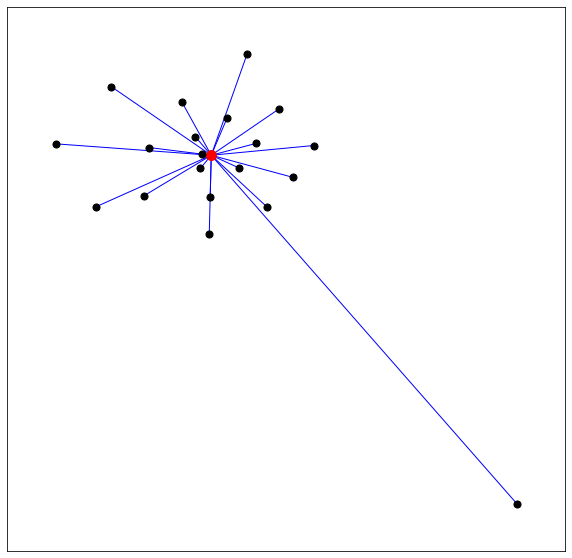

In [101]:
# tx_1d画图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
# 中心点为红色
nx.draw_networkx_nodes(G, pos, nodelist=[center], node_color='r', node_size=100)
# 1d_normal为黑色
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes if G.nodes[x]['type'] == '1d_normal'], node_color='k', node_size=50)
# 1d边为蓝色
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in G.edges(data=True) if d['type'] == '1d'], width=1, edge_color='b')
plt.show()

In [ ]:
# 
tx_1d['Value'].plot()

In [ ]:
# 二阶节点
print(len(os.listdir(pwd + "/钓鱼二阶节点/" + address + "/")))
for filename in os.listdir(pwd + "/钓鱼二阶节点/" + address):
    data = pd.read_csv(pwd + "/钓鱼二阶节点/" + address + "/" + filename)
    for x in range(len(data)):
        item = data.iloc[x]
        if item['From'] not in node2id:
            node2id[item['From']] = len(node2id)
            id2node[node2id[item['From']]] = item['From']
        if item['To'] not in node2id:
            node2id[item['To']] = len(node2id)
            id2node[node2id[item['To']]] = item['To']
    
    # 添加节点
    for x in range(len(data)):
        item = data.iloc[x]
        if node2id[item['From']] not in G.nodes:
            G.add_node(node2id[item['From']], type = '2d_normal')
        if node2id[item['To']] not in G.nodes:
            G.add_node(node2id[item['To']], type = '2d_normal')
        G.add_edge(node2id[item['From']], node2id[item['To']], weight=item['Value'], type='2d')
    

In [ ]:
# 画图
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
center = node2id[address]
pos = nx.spring_layout(G)
# 中心点为红色
nx.draw_networkx_nodes(G, pos, nodelist=[center], node_color='r', node_size=100)
# 1d_normal为黑色
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes if G.nodes[x]['type'] == '1d_normal'], node_color='k', node_size=50)
# 2d_normal为紫色
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes if G.nodes[x]['type'] == '2d_normal'], node_color='purple', node_size=50)
# 1d边为蓝色
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in G.edges(data=True) if d['type'] == '1d'], width=1, edge_color='b')
# 2d边为绿色
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in G.edges(data=True) if d['type'] != '1d'], width=1, edge_color='g')

plt.show()